In [157]:
!pip install factor_analyzer

In [158]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [159]:
# lakukan load dataset terlebih dahulu
import pandas as pd
car = pd.read_csv("drive/My Drive/used_car_data.csv")
car.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [160]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [161]:
# merubah mileage ke str
car['Mileage'].astype(str)

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 6019, dtype: object

In [162]:
# menghapus 4 kata dari belakang mileage
car['Mileage'] = pd.to_numeric(car['Mileage'].astype(str).str[:-4], errors='coerce').replace(np.nan, 0)

In [163]:
car.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,0.00,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74


In [164]:
# merubah engine ke str
car['Engine'].astype(str)

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
6014    1248 CC
6015    1120 CC
6016    2498 CC
6017     998 CC
6018     936 CC
Name: Engine, Length: 6019, dtype: object

In [165]:
# menghapus 2 kata dari belakang engine
car['Engine'] = pd.to_numeric(car['Engine'].astype(str).str[:-2], errors='coerce').replace(np.nan, 0)

In [166]:
car.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,0.00,998.0,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74


In [167]:
# merubah power ke str
car['Power'].astype(str)

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 6019, dtype: object

In [168]:
# menghapus 3 kata dari belakang power
car['Power'] = pd.to_numeric(car['Power'].astype(str).str[:-3], errors='coerce').replace(np.nan, 0)

In [169]:
car.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,0.00,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [170]:
# mengubah rate
label = []
for index, row in car.iterrows():
    if row["Transmission"] == "Automatic":
        label.append(1)
    else:
        label.append(0)

car["Transmission1"] = label
car = car.drop(columns=['Transmission'])
car.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,Price,Transmission1
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,First,28.40,1248.0,74.0,5.0,4.75,0
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,First,24.40,1120.0,71.0,5.0,4.00,0
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Second,14.00,2498.0,112.0,8.0,2.90,0
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,First,18.90,998.0,67.1,5.0,2.65,0
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,First,25.44,936.0,57.6,5.0,2.50,0


In [172]:
# mengubah rate
label = []
for index, row in car.iterrows():
    if row["Fuel_Type"] == "Petrol":
        label.append(0)
    elif row["Fuel_Type"] == "Diesel":
        label.append(1)
    elif row["Fuel_Type"] == "Electric":
        label.append(2)
    elif row["Fuel_Type"] == "CNG":
        label.append(3)
    else:
        label.append(4)

car["Fuel_Type1"] = label
car = car.drop(columns=['Fuel_Type'])
car.tail()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Transmission1,Fuel_Type1
6014,Maruti Swift VDI,Delhi,2014,27365,First,28.40,1248.0,74.0,5.0,4.75,0,1
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,First,24.40,1120.0,71.0,5.0,4.00,0,1
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Second,14.00,2498.0,112.0,8.0,2.90,0,1
6017,Maruti Wagon R VXI,Kolkata,2013,46000,First,18.90,998.0,67.1,5.0,2.65,0,0
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,First,25.44,936.0,57.6,5.0,2.50,0,1


In [174]:
 # mengubah rate
label = []
for index, row in car.iterrows():
    if row["Owner_Type"] == "First":
        label.append(1)
    elif row["Owner_Type"] == "Second":
        label.append(2)
    elif row["Owner_Type"] == "Thrid":
        label.append(3)
    else:
        label.append(4)

car["Owner_Type1"] = label
car = car.drop(columns=['Owner_Type'])
car.tail()

,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Transmission1,Fuel_Type1,Owner_Type1
6014,Maruti Swift VDI,Delhi,2014,27365,28.40,1248.0,74.0,5.0,4.75,0,1,1
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,24.40,1120.0,71.0,5.0,4.00,0,1,1
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,14.00,2498.0,112.0,8.0,2.90,0,1,2
6017,Maruti Wagon R VXI,Kolkata,2013,46000,18.90,998.0,67.1,5.0,2.65,0,0,1
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,25.44,936.0,57.6,5.0,2.50,0,1,1


In [175]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Mileage            6019 non-null   float64
 5   Engine             6019 non-null   float64
 6   Power              6019 non-null   float64
 7   Seats              5977 non-null   float64
 8   Price              6019 non-null   float64
 9   Transmission1      6019 non-null   int64  
 10  Fuel_Type1         6019 non-null   int64  
 11  Owner_Type1        6019 non-null   int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 564.4+ KB


In [176]:
car.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine',
       'Power', 'Seats', 'Price', 'Transmission1', 'Fuel_Type1',
       'Owner_Type1'],
      dtype='object')

In [177]:
# Dropping unnecessary columns
car.drop(['Name', 'Location', 'Year',  ],axis=1,inplace=True)

In [178]:
# Dropping missing values rows
car.dropna(inplace=True)

In [179]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(car)
chi_square_value, p_value

(21990.707621506834, 0.0)

In [180]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(car)

In [181]:
kmo_model

0.7367033603555221

In [201]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(car)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([3.38115142, 1.37742313, 1.11303853, 0.95267103, 0.80069165,
       0.58582046, 0.42039062, 0.27452891, 0.09428424])

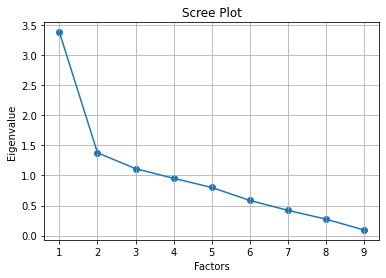

In [202]:
# Create scree plot using matplotlib
plt.scatter(range(1,car.shape[1]+1),ev)
plt.plot(range(1,car.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [203]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(car)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation='promax',
               rotation_kwargs={}, use_smc=True)

In [212]:
# Get variance of each factors
fa.get_factor_variance()

(array([2.87487822, 1.02177485, 0.41258182]),
 array([0.31943091, 0.11353054, 0.04584242]),
 array([0.31943091, 0.43296145, 0.47880388]))